In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import math 
import idx2numpy
import pandas as pd
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
# load the data 
train_x = idx2numpy.convert_from_file('./mnist/train-images-idx3-ubyte').astype(float)
train_y = idx2numpy.convert_from_file('./mnist/train-labels-idx1-ubyte').astype(float)
test_x = idx2numpy.convert_from_file('./mnist/t10k-images-idx3-ubyte').astype(float)
test_y = idx2numpy.convert_from_file('./mnist/t10k-labels-idx1-ubyte').astype(float)

In [5]:
# reshape all of the data. 
train_x_r = train_x.reshape((60000, 784))
train_x_r.shape

(60000, 784)

In [11]:
# get the sevens. 
sevens = []
for i in range(0, train_y.shape[0]): 
    if train_y[i] == 7: 
        sevens.append(train_x_r[i, :])

In [14]:
sevens = np.array(sevens)
sevens.shape

(6265, 784)

In [23]:
mu7 = tf.math.reduce_mean(sevens, 0)

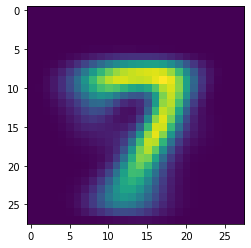

In [47]:
plt.imshow(mu7.numpy().reshape((28,28)))
#plt.savefig("./figures/mu.pdf")

In [32]:
cov7 = tfp.stats.covariance(sevens, sevens, sample_axis=0)
e, v = tf.linalg.eigh(cov7)
v = tf.reverse(v, [1])
e = tf.reverse(e, [0])

In [36]:
v16 = v[:, 0:16]
v16.shape

TensorShape([784, 16])

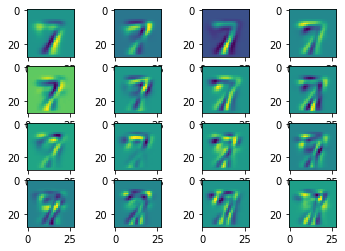

In [46]:
fig, axs = plt.subplots(4,4)
for i in range(0, 16): 
    axs[i // 4, i % 4].imshow(v16[:,i].numpy().reshape((28,28)))
#fig.savefig("./figures/v16.pdf")   

In [62]:
e16 = e[0:16]
e_diag = tf.linalg.diag(e16)
cov = tf.matmul(v16, tf.matmul(e_diag, v16, transpose_b=True))
mvn = tfp.distributions.MultivariateNormalTriL(loc=mu7, scale_tril=np.linalg.cholesky(cov.numpy()+ np.identity(784) * 1e-6))
sample = mvn.sample([16])
sample.shape

TensorShape([16, 784])

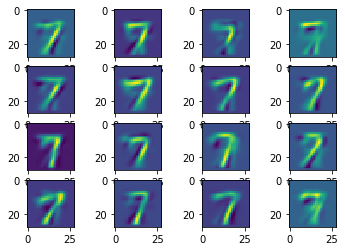

In [64]:
fig, axs = plt.subplots(4,4)
for i in range(0, 16): 
    axs[i // 4, i % 4].imshow(sample[i, :].numpy().reshape((28,28)))
#fig.savefig("./figures/sample16.pdf") 